# parcels regions

runs parcels on existing netcdf files

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import src.utils as utils
import src.runner as runner

INFO: Compiled ParcelsRandom ==> /var/folders/mb/hd5ymr3137g2g0chv_x_tvb40000gq/T/parcels-503/libparcels_random_c9b40b2a-c3a7-4ff4-83a9-9637a378f6d8.so


## configuration

change the contents of `configs` for the simulation configuration you want

In [3]:
configs = [
    "plume_track.json",
    "plume_track_alongshore.json",
    # "plume_track_live.json",
    # "mwb.json",
    # "tijuana_now.json",
#     "buoy_track_704_02.json",
#     "hunington_all.json",
#     "dummy_sim.json",
]

In [4]:
loaded_configs = [utils.load_config(utils.PARCELS_CONFIGS_DIR / path) for path in configs]
sims = []
for cfg in loaded_configs:
    sims.append(runner.prep_sim_from_cfg(cfg))

Timespan reaches the min/max of the range
Latitude span reaches the min/max of the range
Longitude span reaches the min/max of the range
Retrieving thredds dataset...
Data for type ThreddsCode.USWC_2KM_HOURLY not loaded yet. Loading from...
http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/2km/hourly/RTV/HFRADAR_US_West_Coast_2km_Resolution_Hourly_RTV_best.ncd
Retrieving thredds dataset...
Data for type ThreddsCode.USWC_6KM_HOURLY not loaded yet. Loading from...
http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd
total invalid values on target data: 63477
Attempting to interpolate 63477 points...
total invalid values after interpolation with <src.parcels_utils.SurfaceGrid object at 0x7fa4d031c490>: 32844
    values filled: 30633
Attempting to interpolate 32844 points...
total invalid values after interpolation with <src.parcels_utils.SurfaceGrid object at 0x7fa4d031c2d0>: 5482
    values filled: 27362
total invalid v

## Animated gif stuff and particle simulation

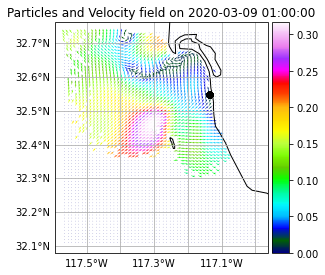

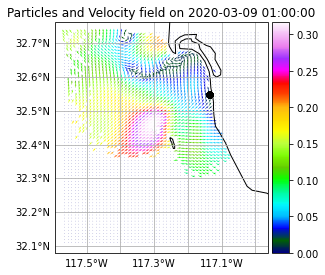

[None, None]

In [5]:
[sim.pset.show(field="vector") for sim in sims]

### simulation execution

In [6]:
for sim in sims:
    sim.execute()

INFO: Compiled ArrayThreddsParticleAdvectionRK4AgeParticleRandomWalk ==> /var/folders/mb/hd5ymr3137g2g0chv_x_tvb40000gq/T/parcels-503/lib97c728f0fe73e2467fa1b9eab357e842_0.so
INFO: Compiled ArrayThreddsParticleAdvectionRK4BorderCheckAgeParticleRandomWalk ==> /var/folders/mb/hd5ymr3137g2g0chv_x_tvb40000gq/T/parcels-503/liba37bbd778e0c104640090815b11a7aa2_0.so


### plot and gif generation

gif generation requires [magick](https://imagemagick.org/index.php)

if it doesn't work just comment out the gif generation line

the gifs will be saved `snapshots/`

In [7]:
for cfg, sim in zip(loaded_configs, sims):
    runner.process_results(sim, cfg)

magick ouptput: ('', '')


snapshots/plume_track.gif
snapshots/plume_track_alongshore.gif


magick ouptput: ('', '')
